In [204]:
import pandas as pd
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline
from functools import reduce


In [205]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/base_dados.csv')

In [206]:
sj_sabugi = df_teste.loc[(df_teste['cidade'] == 'São José do Sabugi')]
patos = df_teste.loc[(df_teste['cidade'] == 'Patos')]
paraiba = df_teste.loc[(df_teste['cidade'] == 'Paraíba')]
joao_pessoa = df_teste.loc[(df_teste['cidade'] == 'João Pessoa')]

In [207]:
sj_sabugi.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
1534,2020-05-11,São José do Sabugi,2,0,0,2,0
1644,2020-05-12,São José do Sabugi,2,0,0,0,0
1758,2020-05-13,São José do Sabugi,2,0,0,0,0
1879,2020-05-14,São José do Sabugi,2,0,0,0,0
2005,2020-05-15,São José do Sabugi,2,0,0,0,0


In [208]:
paraiba.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
5,2020-03-31,Paraíba,17,1,0,0,1
12,2020-04-01,Paraíba,20,1,0,3,0
19,2020-04-02,Paraíba,28,1,0,8,1
26,2020-04-03,Paraíba,30,1,0,2,0
35,2020-04-04,Paraíba,34,3,9,4,2


# Análise São José do Sabugi

In [209]:
# Definindo data de análise
data_inicial = sj_sabugi['data'].values[0]

In [210]:
# Definindo data de análise
paraiba = paraiba.loc[paraiba['data'] >= data_inicial]
paraiba.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
1543,2020-05-11,Paraíba,2525,139,537,184,4
1657,2020-05-12,Paraíba,2777,154,601,252,15
1778,2020-05-13,Paraíba,3045,157,630,268,3
1904,2020-05-14,Paraíba,3361,160,731,316,3
2033,2020-05-15,Paraíba,3739,170,1069,378,10


In [211]:
patos = patos.loc[patos['data'] >= data_inicial]
patos.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
1439,2020-05-11,Patos,109,9,0,16,1
1549,2020-05-12,Patos,128,9,0,19,0
1663,2020-05-13,Patos,138,9,0,10,0
1784,2020-05-14,Patos,174,9,0,36,0
1910,2020-05-15,Patos,219,9,0,45,0


In [212]:
# Inner join das tabelas
dfs = [sj_sabugi, patos, paraiba]
sjs_pt_pb = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)
sjs_pt_pb = sjs_pt_pb[['data','confirmados_x','confirmados_y','confirmados', 'novos_casos_x', 'novos_casos_y', 'novos_casos']]
sjs_pt_pb.head()

,data,confirmados_x,confirmados_y,confirmados,novos_casos_x,novos_casos_y,novos_casos
0,2020-05-11,2,109,2525,2,16,184
1,2020-05-12,2,128,2777,0,19,252
2,2020-05-13,2,138,3045,0,10,268
3,2020-05-14,2,174,3361,0,36,316
4,2020-05-15,2,219,3739,0,45,378


In [213]:
# Ajustando nome das colunas para nomes mais amigáveis 
sjs_pt_pb.columns = ['data','confirmados_sjs','confirmados_patos','confirmados_pb','novos_casos_sjs','novos_casos_patos','novos_casos_pb']
sjs_pt_pb.head()

,data,confirmados_sjs,confirmados_patos,confirmados_pb,novos_casos_sjs,novos_casos_patos,novos_casos_pb
0,2020-05-11,2,109,2525,2,16,184
1,2020-05-12,2,128,2777,0,19,252
2,2020-05-13,2,138,3045,0,10,268
3,2020-05-14,2,174,3361,0,36,316
4,2020-05-15,2,219,3739,0,45,378


In [214]:
# Criando proporção de participação dos novos casos em São José do Sabugi e Patos em relação a Paraíba
sjs_pt_pb['prop_sjs_pb'] = sjs_pt_pb['novos_casos_sjs']*100/sjs_pt_pb['novos_casos_pb']
sjs_pt_pb['prop_patos_pb'] = sjs_pt_pb['novos_casos_patos']*100/sjs_pt_pb['novos_casos_pb']
sjs_pt_pb.head()

,data,confirmados_sjs,confirmados_patos,confirmados_pb,novos_casos_sjs,novos_casos_patos,novos_casos_pb,prop_sjs_pb,prop_patos_pb
0,2020-05-11,2,109,2525,2,16,184,1.086957,8.695652
1,2020-05-12,2,128,2777,0,19,252,0.000000,7.539683
2,2020-05-13,2,138,3045,0,10,268,0.000000,3.731343
3,2020-05-14,2,174,3361,0,36,316,0.000000,11.392405
4,2020-05-15,2,219,3739,0,45,378,0.000000,11.904762


# Casos confirmados São José do Sabugi em relação a Patos

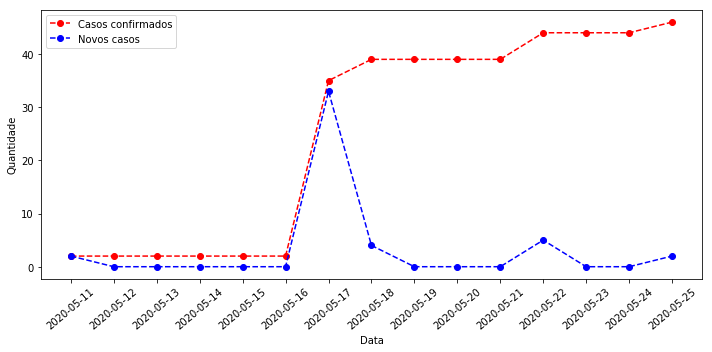

In [221]:
fig, ax = plt.subplots()
ax.plot(sjs_pt_pb['data'], sjs_pt_pb['confirmados_sjs'], 'r--o', label = 'Casos confirmados')
ax.plot(sjs_pt_pb['data'],sjs_pt_pb['novos_casos_sjs'], 'b--o', label = 'Novos casos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
plt.xticks(rotation=40) # Gira as legendas do eixo X
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('confirmados_sjs.png')

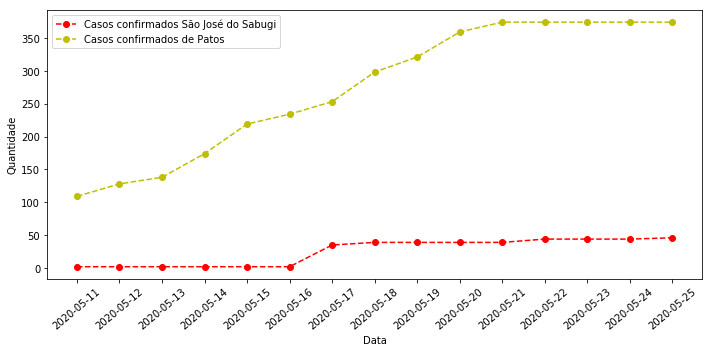

In [216]:
fig, ax = plt.subplots()
ax.plot(sjs_pt_pb['data'], sjs_pt_pb['confirmados_sjs'], 'r--o', label = 'Casos confirmados São José do Sabugi')
ax.plot(sjs_pt_pb['data'],sjs_pt_pb['confirmados_patos'], 'y--o', label = 'Casos confirmados de Patos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
plt.xticks(rotation=40) # Gira as legendas do eixo X
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('confirmados_sjs_patos.png')

# Participação de São José do Sabugiem relação a Patos

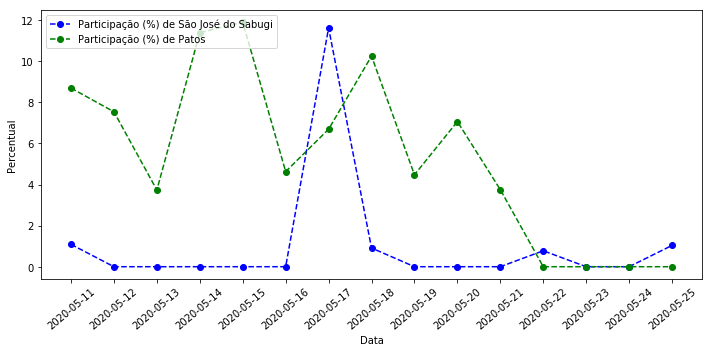

In [217]:
fig, ax = plt.subplots()
ax.plot(sjs_pt_pb['data'], sjs_pt_pb['prop_sjs_pb'], 'b--o', label = 'Participação (%) de São José do Sabugi')
ax.plot(sjs_pt_pb['data'],sjs_pt_pb['prop_patos_pb'], 'g--o', label = 'Participação (%) de Patos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Percentual') # Nome do eixo y
plt.xticks(rotation=40) # Gira as legendas do eixo X
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('partc_sjs_patos.png')

# Comparação com municípios vizinhos

In [222]:
dia_atual = df_teste.loc[df_teste['data'] == '2020-05-25']
dia_atual.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
3449,2020-05-25,João Pessoa,2687,97,0,75,2
3450,2020-05-25,Campina Grande,870,12,0,53,1
3451,2020-05-25,Santa Rita,434,52,0,4,1
3452,2020-05-25,Sousa,100,1,0,0,0
3453,2020-05-25,Igaracy,4,0,0,0,0


In [223]:
# sem patos
dia_atual = dia_atual.loc[(dia_atual['cidade'] == 'Juazeirinho') |
                          (dia_atual['cidade'] == 'São José do Sabugi') |
                          (dia_atual['cidade'] == 'Seridó') |
                          (dia_atual['cidade'] == 'Santa Luzia') |
                          (dia_atual['cidade'] == 'Taperoá') |
                          (dia_atual['cidade'] == 'JSão Mamede') |
                          (dia_atual['cidade'] == 'Quixabá') |
                          (dia_atual['cidade'] == 'Soledade') |
                          (dia_atual['cidade'] == 'São José de Espinharas') |
                          (dia_atual['cidade'] == 'Passagem')
                         ]

dia_atual

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
3460,2020-05-25,Taperoá,27,1,0,1,0
3510,2020-05-25,São José de Espinharas,2,0,0,0,0
3525,2020-05-25,Juazeirinho,40,0,0,0,0
3527,2020-05-25,Santa Luzia,26,2,0,0,0
3544,2020-05-25,Soledade,4,0,0,0,0
3549,2020-05-25,São José do Sabugi,46,0,0,2,0
3563,2020-05-25,Quixabá,5,0,0,0,0
3575,2020-05-25,Seridó,8,0,0,0,0
3580,2020-05-25,Passagem,3,0,0,0,0


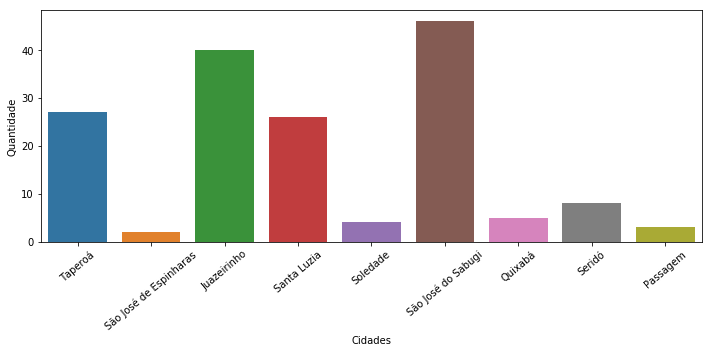

In [224]:
import seaborn as sns

# A linha no meio mostra o desvio padrão, enquanto a barra mostra a média
fig = sns.barplot(x = 'cidade', y = 'confirmados',  data = dia_atual)
fig.set(xlabel='Cidades', ylabel = 'Quantidade', )
fig = fig.get_figure()
plt.xticks(rotation=40)
plt.tight_layout() # Organiza o espaço
fig.savefig('muni_redor_s_patos.png')